# Audio Fingerprinting using Essentia

In [38]:
import essentia
import re
import sys
import os
import numpy
import essentia.streaming as ess
import essentia.standard as es
from essentia.standard import *
from pylab import plot, show, figure, imshow
%matplotlib inline
import matplotlib.pyplot as plt
import IPython

# Importing an audio file in monoloader

In [39]:
audio = es.MonoLoader(filename='Brad.mp3', sampleRate=44100)()
IPython.display.Audio('Brad.mp3')

# Visualising an audio file by sampling

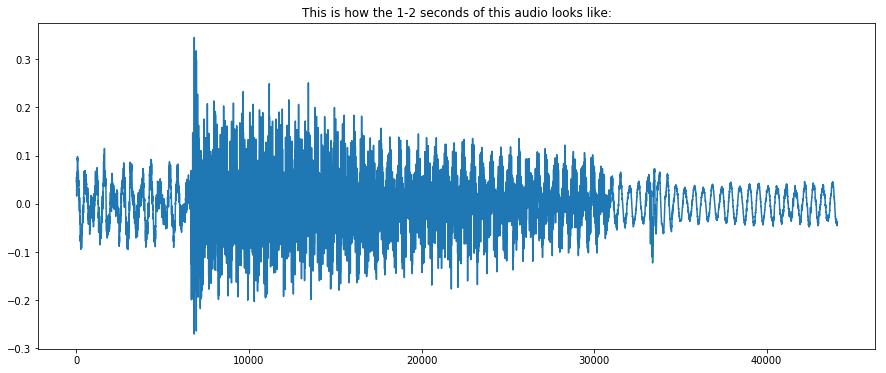

In [32]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import plot, show, figure, imshow

%matplotlib inline

plt.rcParams['figure.figsize'] = (15, 6) 

plot(audio[1*44100:2*44100])
plt.title("This is how the 1-2 seconds of this audio looks like:")
show() 

# Creating spectograms using MFCC

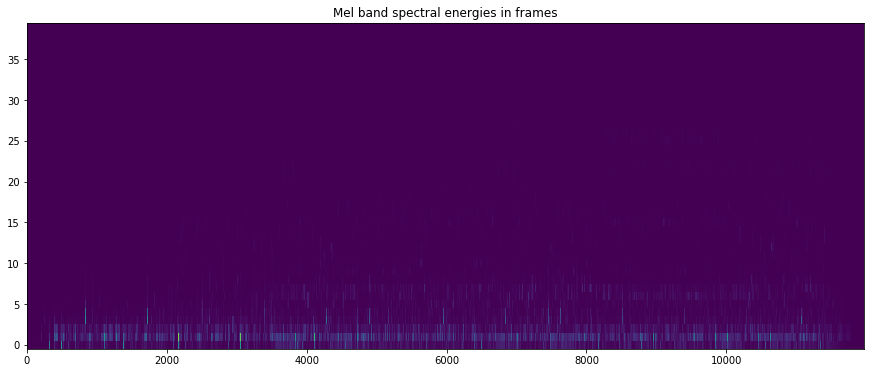

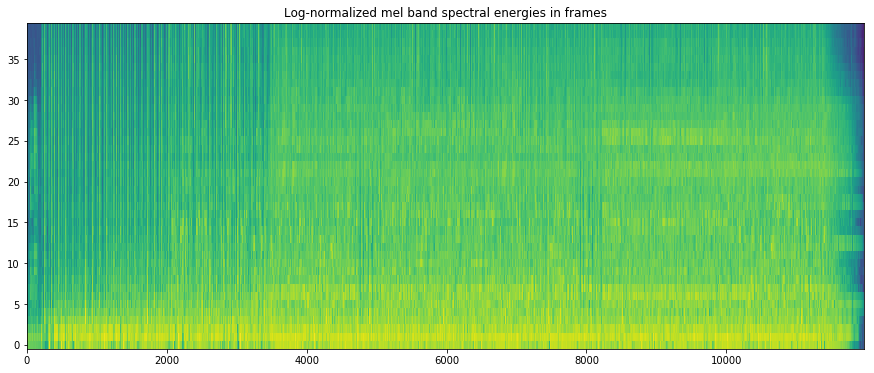

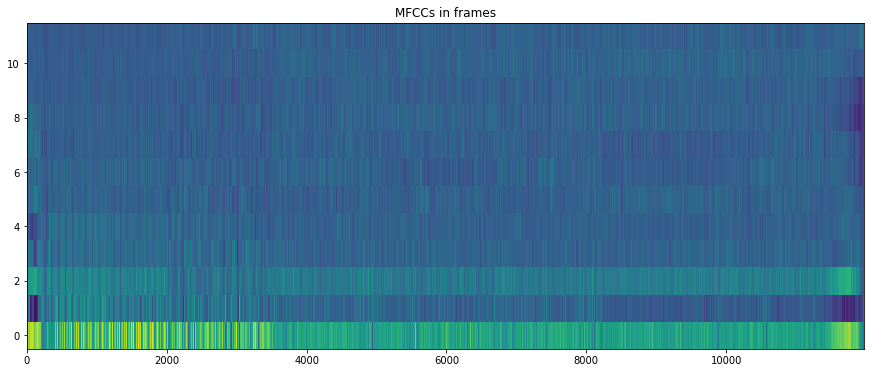

In [33]:
from essentia.standard import *
w = Windowing(type = 'hann')
spectrum = Spectrum()
mfcc = MFCC()

frame = audio[10*44100 : 10*44100 + 1024]
spec = spectrum(w(frame))
mfcc_bands, mfcc_coeffs = mfcc(spec)
mfccs = []
melbands = []
melbands_log = []
logNorm = UnaryOperator(type='log')

for frame in FrameGenerator(audio, frameSize=1024, hopSize=512, startFromZero=True):
    mfcc_bands, mfcc_coeffs = mfcc(spectrum(w(frame)))
    mfccs.append(mfcc_coeffs)
    melbands.append(mfcc_bands)
    melbands_log.append(logNorm(mfcc_bands))

# transpose to have it in a better shape
# we need to convert the list to an essentia.array first (== numpy.array of floats)
mfccs = essentia.array(mfccs).T
melbands = essentia.array(melbands).T
melbands_log = essentia.array(melbands_log).T

# and plotting the mel bands
imshow(melbands[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Mel band spectral energies in frames")
show()

imshow(melbands_log[:,:], aspect = 'auto', origin='lower', interpolation='none')
plt.title("Log-normalized mel band spectral energies in frames")
show()

imshow(mfccs[1:,:], aspect='auto', origin='lower', interpolation='none')
plt.title("MFCCs in frames")
show()

# Creating fingerprint

In [34]:
fingerprint = es.Chromaprinter()(audio)

In [35]:
print (fingerprint)

AQAETVKWSFEURQxu9DmuRCtOkcOPRnqIijrmHQ985ciTFTxxSlEvVNnhfUWfHz-amBVuJai6Q-tg41kshD-O_sZ33EUTkTlyH72GJosiXDv042iOUNxx9Dnw6Igp6fAZVIf2o9GUxcKPH9oXNNfxDBneg_Q44QjVHs8gPuh1lMIpwaeOfuipw3XQJ2h-lHfwZOh1vEY_4avg-IL845cQHucVdFG1o0cj7fiD3IZHBjfOMoL2J0STHF8Ofcdlon3gZDtRSbaEP3hyXOgP8cRzNMWNm3BefNIhdTy-C9dRHs4XXIc9PbhAffhgOjGOqzncdyiLMzq-oPmEXseP88Fb9MRzw3qEcyPqH08OzTo88rgmHD9cSTqew_uL_kefKMcl9If-oy-aZx3-Bx3sF_6N8mgYoWR04cELTyLyFX8ThOuNJj_-4NvxE--JJikphDop_MET5HpwaC_xHBd6EbWJJscnXWBHGr-hXfCX4z1cnBGcD3qOZ0ce-MOo46UTNJp25DouBVr6CZEePHvw6sM_NJs89Ae_GN0H57vxhTlynKmMgzoH_eiJkEyPhn1x5FJ29NGhVTl-nIZ_cJ6J3-jDQyfKC022HCV3IdtxgzryHM-hJc6H8MJ7PHpRdviio9GDS37Qc8gT1IKOHt_Ri8TRo0lHEWS4Dzqq9WgcxByLfGhy9BmUE33gRoFr_AuewDKP_ngSQVcUo9kj9MifYNfxDnzQwU6PyjnyVMVz9PDIHP12PEcfNE-E58N39Bck7SnatFC-Kjg06mhc48vRqKGFn0K6HjdMaSlq_TgihbuEzicuZYeWV-CuIx_KhceXyMIv477h80YeaiS-Q_uD9D-8KMePJk2C-3jxhsgL_sOhUT3MZbiLI5WPN8cLPzty3BArxBf-Y8uFX3BV2KFwpFfwYxoDTT9umEXs4uJwWvgPH_fx5nCP6fjxPvhy5GJuXIJ25viJWjRiRjjCrDX6WNCVWRqOo2eQHj_xKQ9RktnQ

# Looking up fingerprint

In [36]:
duration = len(audio) / 44100.
print (duration)

138.954013605


In [43]:
client = 'B1gyqijoEJ' # This is not a valid key. Use your own key#
query = 'http://api.acoustid.org/v2/lookup?client=%s&meta=recordings+releasegroups+compress&duration=%i&fingerprint=%s' \
%(client, duration, fingerprint)

from six.moves import urllib
page = urllib.request.urlopen(query)
print(page.read())

{"status": "ok", "results": [{"recordings": [{"artists": [{"id": "9c070e4f-28c1-4b98-b371-d8514c31ba55", "name": "Brad Sucks"}], "duration": 140, "releasegroups": [{"type": "Album", "id": "16f30346-886a-3144-9377-cbfceb32fd34", "title": "Out of It"}], "title": "Total Breakdown", "id": "42d16827-f4c7-4b58-a64f-eb40a607ba86"}], "score": 1.0, "id": "a47d9462-72dd-47b6-baa4-ac0150162497"}]}
